In [144]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [145]:
df = pd.read_csv('/Users/guillermo/Downloads/Waitlist___Ethnicity_by_Organ (1).csv')
df 

,Unnamed: 0,Unnamed: 1,All Ethnicities,White,Black,Hispanic,Asian,American Indian/Alaska Native,Pacific Islander,Multiracial
0,All Organs,NaN,"117,948","47,270","34,040","23,781","9,992",983,624,"1,258"
1,Kidney,NaN,"98,361","34,900","31,316","20,509","9,110",847,586,"1,093"
2,Liver,NaN,"12,070","8,054",861,"2,316",629,94,26,90
3,Pancreas,NaN,892,553,173,127,24,6,1,8
4,Kidney / Pancreas,NaN,"1,746",849,507,263,80,18,4,25
5,Heart,NaN,"3,582","2,061",997,370,103,11,5,35
6,Lung,NaN,"1,021",693,128,153,35,6,1,5
7,Heart / Lung,NaN,45,29,8,4,3,1,0,0
8,Intestine,NaN,213,116,48,38,8,0,1,2
9,Abdominal Wall,NaN,3,3,0,0,0,0,0,0


In [146]:
df.drop(['Unnamed: 1'], axis = 1, inplace = True)
df.drop([9,14])
df.rename(columns={"Unnamed: 0": "Organ"}, inplace = True)
df

,Organ,All Ethnicities,White,Black,Hispanic,Asian,American Indian/Alaska Native,Pacific Islander,Multiracial
0,All Organs,"117,948","47,270","34,040","23,781","9,992",983,624,"1,258"
1,Kidney,"98,361","34,900","31,316","20,509","9,110",847,586,"1,093"
2,Liver,"12,070","8,054",861,"2,316",629,94,26,90
3,Pancreas,892,553,173,127,24,6,1,8
4,Kidney / Pancreas,"1,746",849,507,263,80,18,4,25
5,Heart,"3,582","2,061",997,370,103,11,5,35
6,Lung,"1,021",693,128,153,35,6,1,5
7,Heart / Lung,45,29,8,4,3,1,0,0
8,Intestine,213,116,48,38,8,0,1,2
9,Abdominal Wall,3,3,0,0,0,0,0,0


In [147]:
df['White'] = df['White'].str.replace(',','').astype(int)
df['Black'] = df['Black'].str.replace(',','').astype(int)
df['Hispanic'] = df['Hispanic'].str.replace(',','').astype(int)
df['Asian'] = df['Asian'].str.replace(',','').astype(int)
df['Multiracial'] = df['Multiracial'].str.replace(',','').astype(int)
df['All Ethnicities'] = df['All Ethnicities'].str.replace(',', '').astype(int)
df.dtypes

Organ                            object
All Ethnicities                   int64
White                             int64
Black                             int64
Hispanic                          int64
Asian                             int64
American Indian/Alaska Native     int64
Pacific Islander                  int64
Multiracial                       int64
dtype: object

In [148]:
'''
Dividing each column by all ethnicities to get a proportion that each ethnicity donated in 
relation to the 'All Ethnicities' column
'''
df['All Ethnicities'] = (df['All Ethnicities']) / 1
df['White'] = (df['White'] / df['All Ethnicities']) 
df['Black'] = (df['Black'] / df['All Ethnicities'])
df['Hispanic'] = (df['Hispanic'] / df['All Ethnicities'])
df['Asian'] = (df['Asian'] / df['All Ethnicities'])
df['Multiracial'] = (df['Multiracial'] / df['All Ethnicities']) 
df['American Indian/Alaska Native'] = (df['American Indian/Alaska Native'] / df['All Ethnicities']) 
df['Pacific Islander'] = (df['Pacific Islander'] / df['All Ethnicities'])
df

,Organ,All Ethnicities,White,Black,Hispanic,Asian,American Indian/Alaska Native,Pacific Islander,Multiracial
0,All Organs,117948.0,0.400770,0.288602,0.201623,0.084715,0.008334,0.005290,0.010666
1,Kidney,98361.0,0.354815,0.318378,0.208507,0.092618,0.008611,0.005958,0.011112
2,Liver,12070.0,0.667274,0.071334,0.191881,0.052113,0.007788,0.002154,0.007457
3,Pancreas,892.0,0.619955,0.193946,0.142377,0.026906,0.006726,0.001121,0.008969
4,Kidney / Pancreas,1746.0,0.486254,0.290378,0.150630,0.045819,0.010309,0.002291,0.014318
5,Heart,3582.0,0.575377,0.278336,0.103294,0.028755,0.003071,0.001396,0.009771
6,Lung,1021.0,0.678746,0.125367,0.149853,0.034280,0.005877,0.000979,0.004897
7,Heart / Lung,45.0,0.644444,0.177778,0.088889,0.066667,0.022222,0.000000,0.000000
8,Intestine,213.0,0.544601,0.225352,0.178404,0.037559,0.000000,0.004695,0.009390
9,Abdominal Wall,3.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [149]:
# Dropping columns that I do not need
df.drop(['Organ', 'All Ethnicities', 'American Indian/Alaska Native', 'Pacific Islander', 'Multiracial'], axis = 1, inplace = True)
df

,White,Black,Hispanic,Asian
0,0.400770,0.288602,0.201623,0.084715
1,0.354815,0.318378,0.208507,0.092618
2,0.667274,0.071334,0.191881,0.052113
3,0.619955,0.193946,0.142377,0.026906
4,0.486254,0.290378,0.150630,0.045819
5,0.575377,0.278336,0.103294,0.028755
6,0.678746,0.125367,0.149853,0.034280
7,0.644444,0.177778,0.088889,0.066667
8,0.544601,0.225352,0.178404,0.037559
9,1.000000,0.000000,0.000000,0.000000


In [150]:
# Putting the value of the 'All Organs' row into an array to use for the next chart
all_perc_values = df.loc[0,:].values.copy()
all_perc_values2 = all_perc_values.copy()

<ipython-input-151-44ab92a79fa8>:9: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(all_perc_values2, labels = my_labels, explode = my_explode, autopct='%1.0f%%', shadow = True, startangle = 90)


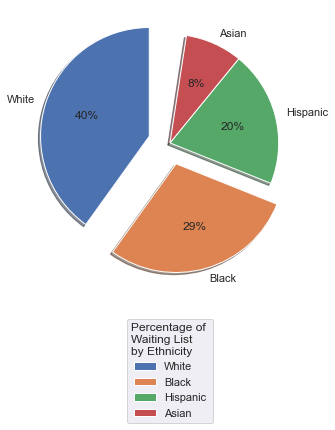

In [151]:
'''
This pie chart shows the percentage of each ethnicity on the waiting list proportioned to the 
overall waiting list.
'''
sns.set_theme(style="darkgrid")
my_labels = ['White', 'Black', 'Hispanic', 'Asian'] 
ax1 = plt.subplots(figsize =(5,5)) 
my_explode = (0.2, 0.2, 0, 0)
plt.pie(all_perc_values2, labels = my_labels, explode = my_explode, autopct='%1.0f%%', shadow = True, startangle = 90) 
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.55), title = "Percentage of \nWaiting List \nby Ethnicity") 
plt.show();

In [152]:
'''
Normalizing the percentage of people per Ethnicity by the specific population of that ethnicity 
to accurately graph the percentage of those on the waitlist. 
'''
ethnic_mean = [0.7593333333333333, 0.12333333333333334, 0.126, 0.03866666666666667]
all_perc_values[0] = all_perc_values[0]/ethnic_mean[0]
all_perc_values[1] = all_perc_values[1]/ethnic_mean[1]
all_perc_values[2] = all_perc_values[2]/ethnic_mean[2]
all_perc_values[3] = all_perc_values[3]/ethnic_mean[3]
all_perc_values
# Can this be shortened by writing a function?

array([0.5277917 , 2.34001424, 1.60018055, 2.19091289])

# Pie chart of ethnicities on the waiting list
# for all Organs

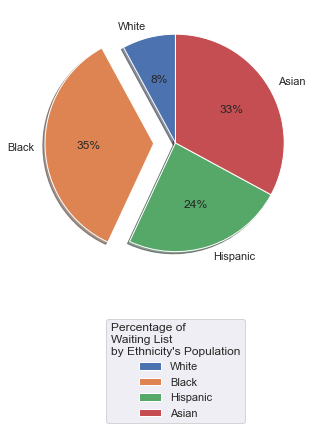

In [153]:
'''
This graph shows the representation of each ethnicity on the waiting list in proportion to their respective 
ethnicity's population
'''
sns.set_theme(style="darkgrid")
my_labels = ['White', 'Black', 'Hispanic', 'Asian'] 
ax1 = plt.subplots(figsize =(5,5)) 
my_explode = (0, 0.2, 0, 0)
plt.pie(all_perc_values, labels = my_labels, explode = my_explode, autopct='%1.0f%%', shadow = True, startangle = 90) 
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.55), title = "Percentage of \nWaiting List \nby Ethnicity's Population") 
plt.show()

In [154]:
# Creating an array of values that pulls from the 'Kidney' row from the orginal dataframe
kid_perc_values = df.loc[1,:].values
kid_perc_values

array([0.35481542, 0.31837822, 0.20850744, 0.09261801])

# Pie chart showing each ethnicity on the waiting list for a kidney in proportion to the 'All Ethnicities' column

<ipython-input-155-e12a8c4bf98e>:4: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(kid_perc_values, labels = my_labels, autopct='%1.0f%%', shadow = True, startangle = 90)


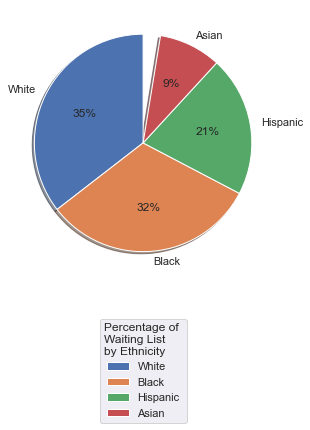

In [155]:
sns.set_theme(style="darkgrid")
my_labels = ['White', 'Black', 'Hispanic', 'Asian']
fig1, ax1 = plt.subplots(figsize =(5,5))
plt.pie(kid_perc_values, labels = my_labels, autopct='%1.0f%%', shadow = True, startangle = 90)
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.55), title = 'Percentage of \nWaiting List \nby Ethnicity')
plt.show()

In [156]:
'''
Dividing each value kid_perc_values by the respective ethnicity's mean to proportion the kidney waiting list by 
    the population of each ethnicity.  This shows how much their population represents their need for a kidney
'''

kid_perc_values[0] = kid_perc_values[0]/ethnic_mean[0]
kid_perc_values[1] = kid_perc_values[1]/ethnic_mean[1]
kid_perc_values[2] = kid_perc_values[2]/ethnic_mean[2]
kid_perc_values[3] = kid_perc_values[3]/ethnic_mean[3]
kid_perc_values
# Work with Cameron on how to write a loop for this

array([0.46727229, 2.58144502, 1.65482093, 2.39529334])

# Pie chart showing the waiting list for a kidney in proportion to ethnicity's population

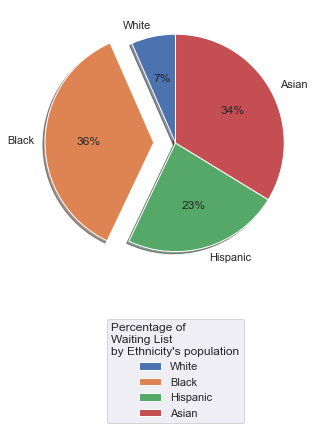

In [157]:
sns.set_theme(style="darkgrid")
my_labels = ['White', 'Black', 'Hispanic', 'Asian']
fig1, ax1 = plt.subplots(figsize =(5,5))
my_explode = (0, 0.2, 0, 0)
plt.pie(kid_perc_values, labels = my_labels, explode = my_explode, autopct='%1.0f%%', shadow = True, startangle = 90)
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.55), title = "Percentage of \nWaiting List \nby Ethnicity's population")
plt.show()